In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
calories=pd.read_csv('c:/Users/Admin/Downloads/calories.csv')
calories.head(6)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
5,15130815,123.0


In [4]:
exercise = pd.read_csv('c:/Users/Admin/Documents/notes/exercise.csv')
exercise.head(6)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7


# Combining Calories & exercise

In [5]:
df=pd.merge(exercise,calories,on='User_ID')
df.head(6)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0


In [6]:
df=df.reset_index()
df.head(6)

,index,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0


In [7]:
df.describe()

,index,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,4330.271354,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,0.000000,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,3749.750000,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,7499.500000,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,11249.250000,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,14999.000000,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [8]:
df.shape

(15000, 10)

In [9]:
df.columns

Index(['index', 'User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [10]:
df.isnull().sum()

index         0
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# plots

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'Heart_Rate'}>,
        <AxesSubplot:title={'center':'Body_Temp'}>,
        <AxesSubplot:title={'center':'Calories'}>]], dtype=object)

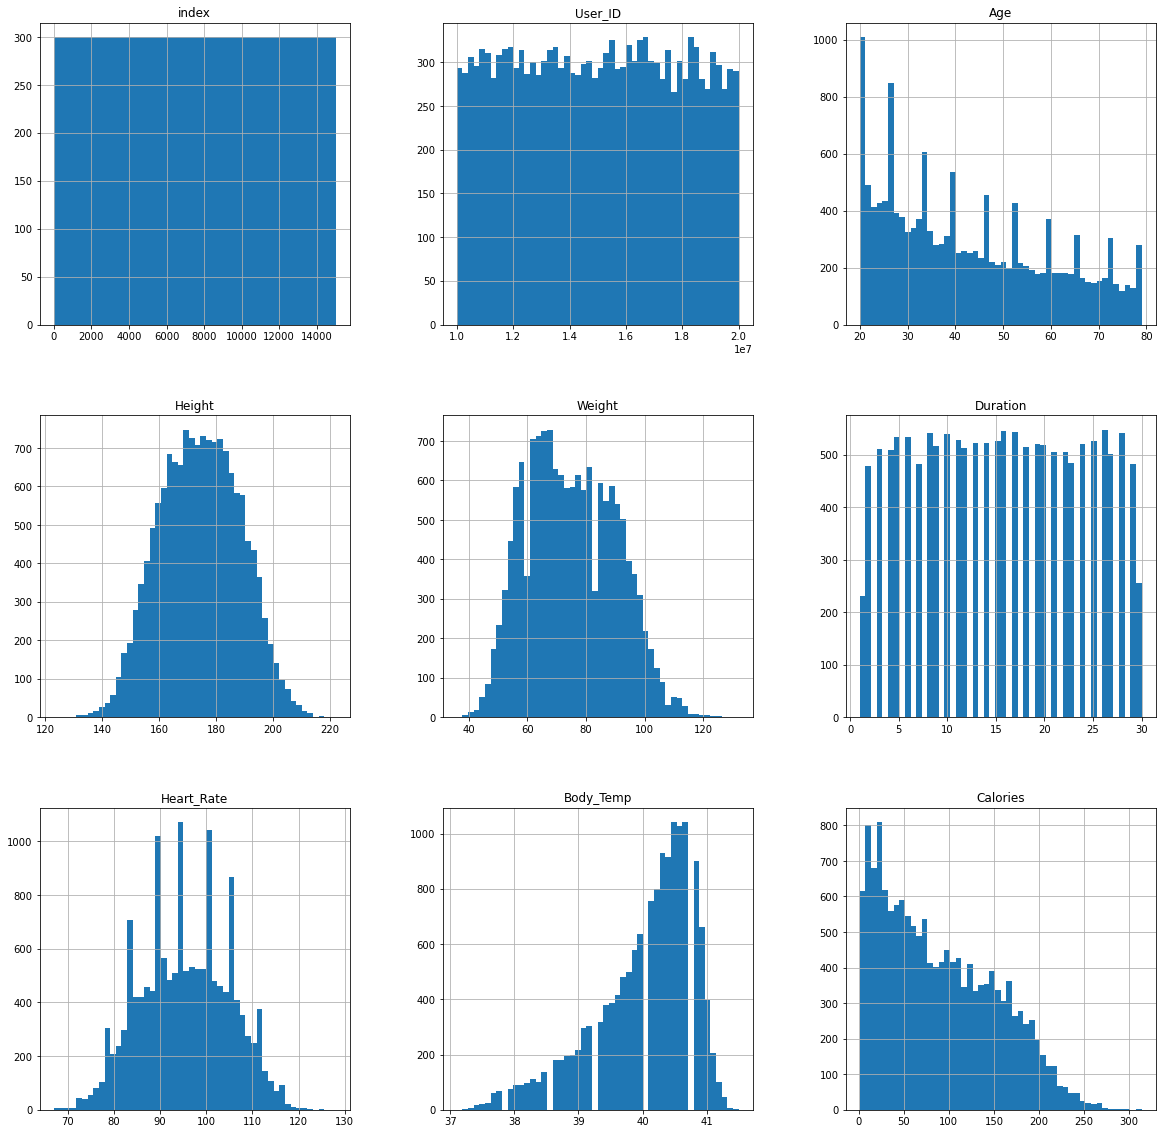

In [11]:
df.hist(figsize=(20,20),bins=50)

C:\Users\Admin\anaconda3\envs\KavyaNiharika\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

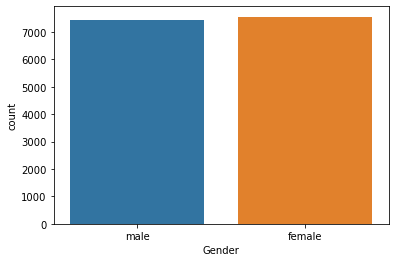

In [12]:
sns.countplot('Gender',data=df)

<AxesSubplot:>

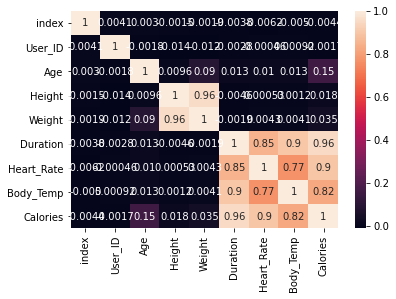

In [13]:
sns.heatmap(df.corr(),annot=True)

# Categorical Variables

In [14]:
a=df.select_dtypes(object)
a.head()

,Gender
0,male
1,female
2,male
3,female
4,female


In [15]:
a = pd.get_dummies(df['Gender'],drop_first=True)

In [16]:
df = df.drop(['Gender'],axis=1)

In [17]:
df = pd.concat([df,a],axis=1)

In [18]:
df.head()

,index,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,male
0,0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,0


# Feature selection

In [19]:
x = df.drop(['index','User_ID','Calories'],1)
x.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,male
0,68,190.0,94.0,29.0,105.0,40.8,1
1,20,166.0,60.0,14.0,94.0,40.3,0
2,69,179.0,79.0,5.0,88.0,38.7,1
3,34,179.0,71.0,13.0,100.0,40.5,0
4,27,154.0,58.0,10.0,81.0,39.8,0


In [20]:
y=df['Calories']
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

# Algorithms

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
sc = StandardScaler()

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [24]:
xtrain.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,male
11797,55,183.0,88.0,3.0,79.0,38.6,1
5899,40,207.0,113.0,20.0,98.0,40.2,1
9513,47,171.0,69.0,19.0,100.0,40.4,0
1572,32,185.0,84.0,28.0,107.0,40.9,1
12995,29,193.0,92.0,4.0,85.0,39.0,1


In [25]:
ytrain.head()

11797     10.0
5899     120.0
9513     108.0
1572     177.0
12995     12.0
Name: Calories, dtype: float64

In [26]:
xtest.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,male
11499,45,154.0,52.0,26.0,107.0,40.6,0
6475,21,187.0,90.0,29.0,111.0,40.5,1
13167,58,176.0,77.0,11.0,90.0,40.0,1
862,35,182.0,89.0,24.0,108.0,40.8,1
5970,67,171.0,67.0,29.0,116.0,41.1,0


In [27]:
ytest.head()

11499    173.0
6475     189.0
13167     53.0
862      161.0
5970     226.0
Name: Calories, dtype: float64

In [28]:
xtrain=sc.fit_transform(xtrain)

In [29]:
xtest=sc.transform(xtest)

# LinearRegression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg = LinearRegression()

In [32]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [33]:
reg.coef_

array([  8.46098552,  -2.53262003,   4.46142043,  55.19179727,
        18.96681014, -13.24090083,  -0.67644022])

In [34]:
reg.intercept_

89.01695238095236

In [35]:
reg.score(xtrain,ytrain)

0.9675689502381044

In [36]:
from sklearn.metrics import r2_score

In [37]:
y_pred=reg.predict(xtrain)

In [38]:
b=pd.DataFrame({'actual':ytrain,'predict':y_pred})
b.head()

,actual,predict
11797,10.0,5.451107
5899,120.0,124.516347
9513,108.0,116.649697
1572,177.0,174.904061
12995,12.0,3.672054


In [39]:
ypred=reg.predict(xtest)

In [40]:
c=pd.DataFrame({"actual":ytest,'predict':ypred})
c.head()

,actual,predict
11499,173.0,170.562592
6475,189.0,192.188316
13167,53.0,56.129278
862,161.0,155.572293
5970,226.0,212.268226


In [41]:
r2_score(ytrain,y_pred)

0.9675689502381044

In [42]:
r2_score(ytest,ypred)

0.9663275127619021